# **Lab 4** - Morphological Image Processing
## B
## Ardian
## 2106638173

In [2]:
from skimage import io, filters
from skimage.morphology import disk, diamond, erosion, dilation, opening, closing, black_tophat, white_tophat
import matplotlib.pyplot as plt

## 1. shape.png

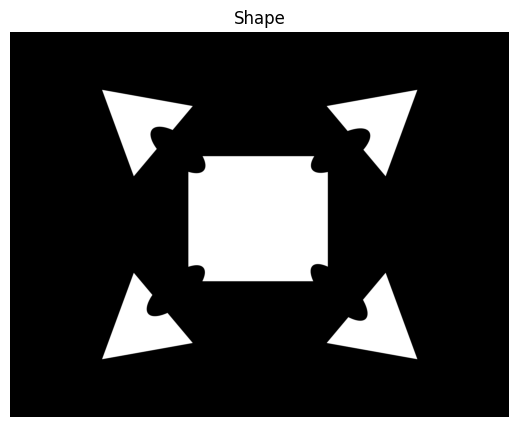

In [2]:
shape = io.imread('shape.png', as_gray = True)

plt.figure(figsize = (15, 5))
plt.title("Shape")
plt.axis("off")
plt.imshow(shape, cmap = "gray")

### a. Lakukan berbagai percobaan manipulasi citra dengan morphology transformation hingga mendap- atkan citra yang mirip dengan (b) Shape After!

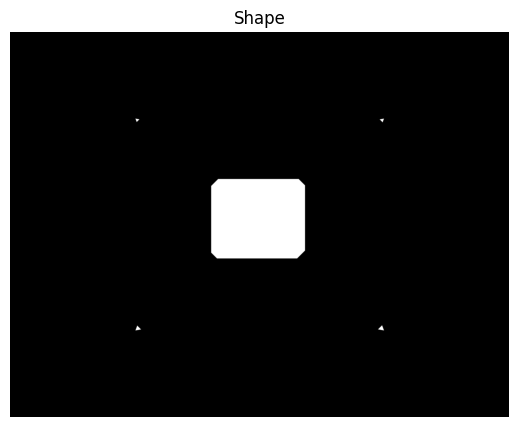

In [3]:
eroded_shape = erosion(shape, diamond(10))

n_erosion = 6

for i in range (0, n_erosion):
    eroded_shape = erosion(eroded_shape, diamond(10))

plt.figure(figsize = (15, 5))
plt.title("Shape")
plt.axis("off")
plt.imshow(eroded_shape, cmap = "gray")

Saya menggunakan for loop dibandingkan langsung `diamond(70)` untuk komputasi yang jauh lebih cepat

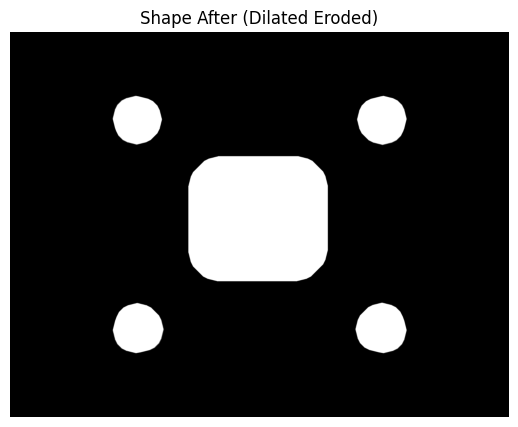

In [4]:
dilated_eroded_shape = dilation(eroded_shape, disk(10))

n_dilation = 6

for i in range (0, n_dilation):
    dilated_eroded_shape = dilation(dilated_eroded_shape, disk(10))

plt.figure(figsize = (15, 5))
plt.title("Shape After (Dilated Eroded)")
plt.axis("off")
plt.imshow(dilated_eroded_shape, cmap = "gray")

### b. Jelaskan dengan jelas mengapa Anda mengerjakan poin a dengan cara tersebut!

Saya menghasilkan *Shape After* dengan cara menerapkan erosi dengan strel diamond dengan panjang sisi 10 sebanyak 7 kali, lalu menerapkan dilasi dengan strel disk/lingkaran.

Penerapan erosi dilakukan untuk mengecilkan objek-objek disamping ke titik tengah (centerlines)-nya, ini bertujuan agar saat diterapkan dilasi nanti, titik titik ini akan menghasilkan objek yang mendekati bentuk lingkaran seperti pada gambar *Shape After* pada soal. Erosi di sini menggunakan strel diamond, strel diamond bisa menghilangkan lengkungan kedalam dari pojok objek tengah tanpa menghasilkan efek yang aneh pada 4 objek kecil lainnya. Strel diamond juga menghasilkan objek tengah yang mendekati bentuk persegi panjang dengan sedikit lengkungan pada pojoknya seperti yang diharapkan pada gambar *Shape After* pada soal.

Dengan hasil erosi yang telah kita dapatkan, kita bisa langsung menghasilkan *Shape After* dengan menerapkan dilasi dengan strel disk (lingkaran) dengan radius 10. Strel ini menghasilkan 4 objek terluar menjadi seperti yang diharapkan pada gambar *Shape After* pada soal dan juga menghasilkan objek tengah menjad iseperti yang diharapkan ada gambar *Shape After* pada soal.

## 2. AI.png

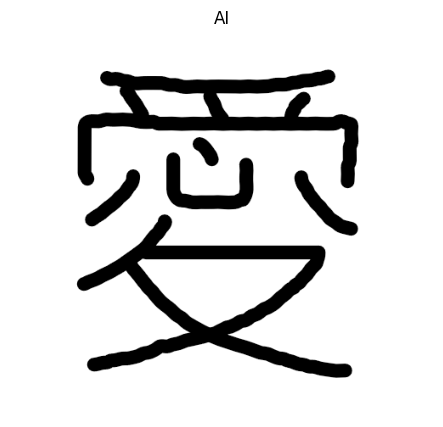

In [5]:
ai = io.imread('AI.png', as_gray = True)

plt.figure(figsize = (15, 5))
plt.title("AI")
plt.axis("off")
plt.imshow(ai, cmap = "gray")

### a. Lakukan berbagai percobaan manipulasi citra dengan morphology transformation hingga mendap- atkan citra yang mirip dengan (b) AI After!

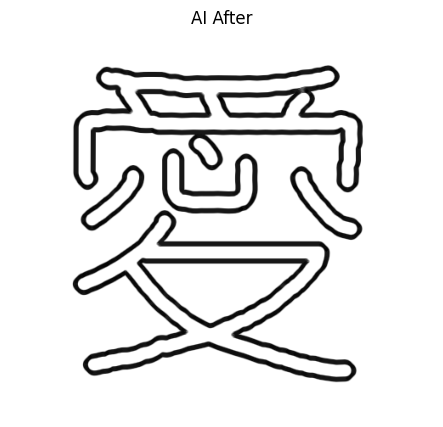

In [6]:
eroded_ai = erosion(ai, disk(2))
edge_ai = 255 - filters.sobel(eroded_ai)
eroded_edge_ai = erosion(edge_ai, disk(2))

plt.figure(figsize = (15, 5))
plt.title("AI After")
plt.axis("off")
plt.imshow(eroded_edge_ai, cmap = "gray")

### b. Ceritakan mengapa Anda mengerjakan poin a dengan cara tersebut!

Saya menghasilkan *AI After* dengan cara menggunakan edge detection untuk mendapatkan edge dari gambar tersebut yang kemudian di-invert, lalu menerapkan erosi dengan strel disk/lingkaran dengan radius 2.

Namun, sebelum melakukan edge detection, saya menerapkan erosion terlebih dahulu dengan strel disk dengan radius 2, dengan ini edge yang dihasilkan akan agak sedikit keluar dari edge aslinya, ini betujuan agar pada saat saya menerapkan erosi kembali lagi nanti, bagian putih di dalam huruf tersebut memiliki ketebalan yang semirip mungkin dengan ketebalan huruf aslinya.

## 3. road_sign1.jpg & road_sign2.jpg

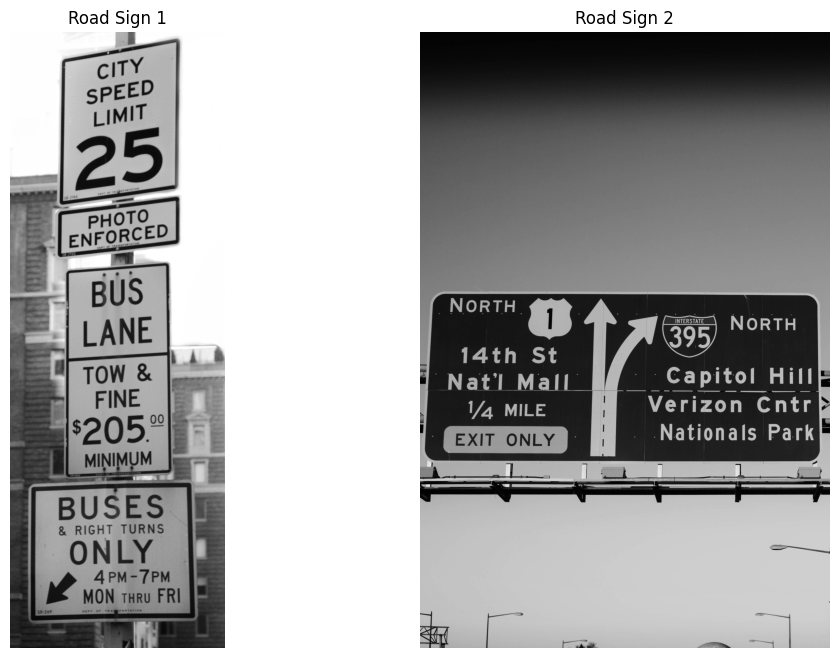

In [4]:
rs1 = io.imread('road_sign1.jpg', as_gray = True)
rs2 = io.imread('road_sign2.jpg', as_gray = True)

plt.figure(figsize = (12, 8))

plt.subplot(1, 2, 1)
plt.title("Road Sign 1")
plt.axis("off")
plt.imshow(rs1, cmap = "gray")

plt.subplot(1, 2, 2)
plt.title("Road Sign 2")
plt.axis("off")
plt.imshow(rs2, cmap = "gray")

### a. Terapkan operasi morfologis yang paling tepat pada kedua citra di atas sesuai deskripsi soal.

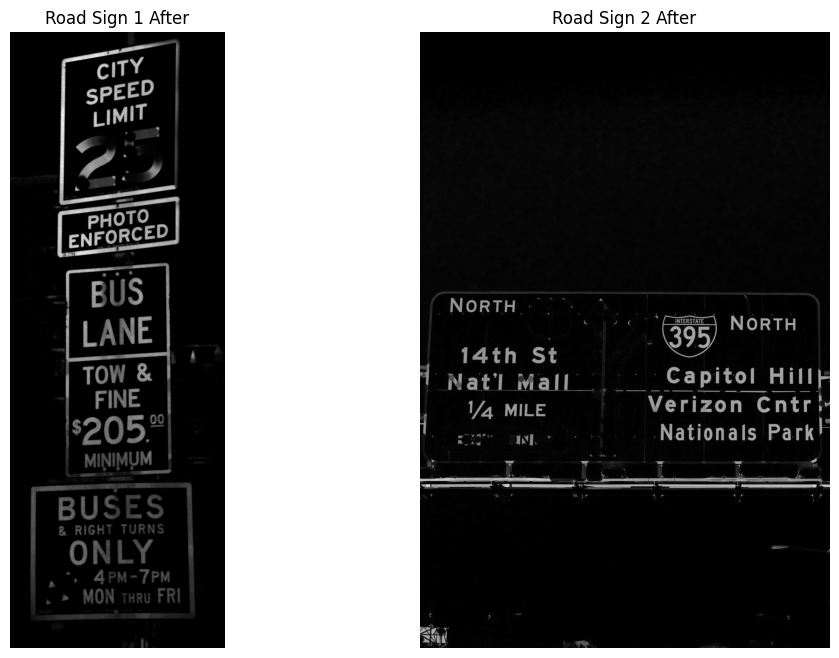

In [5]:
# Road Sign 1 Processing
o_rs1 = opening(rs1, disk(5))
bth_o_rs1 = black_tophat(o_rs1, disk(35))
gt_bth_o_rs1 = bth_o_rs1 ** 3
dilated_gt_bth_o_rs1 = dilation(gt_bth_o_rs1, disk(5))
closed = closing(dilated_gt_bth_o_rs1, disk(5))

# Road Sign 2 Processing
wth_rs2 = white_tophat(rs2, disk(17))

plt.figure(figsize = (12, 8))

plt.subplot(1, 2, 1)
plt.title("Road Sign 1 After")
plt.axis("off")
plt.imshow(dilated_gt_bth_o_rs1, cmap = "gray")

plt.subplot(1, 2, 2)
plt.title("Road Sign 2 After")
plt.axis("off")
plt.imshow(wth_rs2, cmap = "gray")

### b. Ceritakan hasil yang Anda dapatkan pada bagian a. Lalu, berikan pendapat Anda apakah hasilnya sudah cukup baik (dalam menonjolkan teks pada citra).

#### **Road Sign 1:**
Hasil transformasi Road Sign 1 cukup baik, hanya saja sedikit kurang di angka 25 yang besar, ini dikarenakan saya memaksimalkan penghilangan gedung yang ada di belakang tanpa menghilangkan teks kecil pada bagian bawah. Selain dari angka 25, hasilnya sangat baik, bisa dilihat bahwa teks yang dihasilkan sangatlah jelas.

#### **Road Sign 2:**
Hasil transformasi Road Sign 2 cukup baik, hanya saja saya tidak bisa mengambil tulisan yang "EXIT ONLY" dan angka 1. Hal tersebut dikarenakan tulisan tersebut berbeda tampilannya dengan mayoritas tulisan lainnya. Sealin dari itu, hasilnya sangat baikm bisa dilihat bahwa teks yang dihasilkan sangatlah jelas